In [1]:
import cobra
import pandas as pd
import requests
from cobra.io import load_json_model
import json
from glob import glob
import seaborn as sns

In [2]:
# BiGG API access: http://bigg.ucsd.edu/data_access

In [3]:
url ='http://bigg.ucsd.edu/api/v2/models'
r = requests.get(url=url)
models=r.json()['results']

In [4]:
models = pd.DataFrame(models)
models

,bigg_id,gene_count,metabolite_count,organism,reaction_count
0,e_coli_core,137,72,Escherichia coli str. K-12 substr. MG1655,95
1,iAB_RBC_283,346,342,Homo sapiens,469
2,iAF1260,1261,1668,Escherichia coli str. K-12 substr. MG1655,2382
3,iAF1260b,1261,1668,Escherichia coli str. K-12 substr. MG1655,2388
4,iAF692,692,628,Methanosarcina barkeri str. Fusaro,690
5,iAF987,987,1109,Geobacter metallireducens GS-15,1285
6,iAPECO1_1312,1313,1942,Escherichia coli APEC O1,2735
7,iAT_PLT_636,636,738,Homo sapiens,1008
8,iB21_1397,1337,1943,Escherichia coli BL21(DE3),2741
9,iBWG_1329,1329,1949,Escherichia coli BW2952,2741


In [5]:
ecoli = models[models.organism.str.contains('Escherichia coli')]
ecoli

,bigg_id,gene_count,metabolite_count,organism,reaction_count
0,e_coli_core,137,72,Escherichia coli str. K-12 substr. MG1655,95
2,iAF1260,1261,1668,Escherichia coli str. K-12 substr. MG1655,2382
3,iAF1260b,1261,1668,Escherichia coli str. K-12 substr. MG1655,2388
6,iAPECO1_1312,1313,1942,Escherichia coli APEC O1,2735
8,iB21_1397,1337,1943,Escherichia coli BL21(DE3),2741
9,iBWG_1329,1329,1949,Escherichia coli BW2952,2741
10,ic_1306,1307,1936,Escherichia coli CFT073,2726
12,iE2348C_1286,1287,1919,Escherichia coli O127:H6 str. E2348/69,2703
13,iEC042_1314,1314,1926,Escherichia coli 042,2714
14,iEC55989_1330,1330,1953,Escherichia coli 55989,2756


In [6]:
# download a model
def download_model(model):
    
    url = 'http://bigg.ucsd.edu/api/v2/models/%s/download'%model
    r = requests.get(url=url)
    data=r.json()
    out = 'models/%s.json'%model
    print('downloading %s to %s'%(model,out))
    with open(out, 'w') as outfile:
        json.dump(data, outfile)
model = 'iML1515'
download_model(model)

downloading iML1515 to models/iML1515.json


In [7]:
# Download all models:
#for i in ecoli.index:
#    model = ecoli.loc[i,'bigg_id']
#    download_model(model)

downloading e_coli_core to models/e_coli_core.json
downloading iAF1260 to models/iAF1260.json
downloading iAF1260b to models/iAF1260b.json
downloading iAPECO1_1312 to models/iAPECO1_1312.json
downloading iB21_1397 to models/iB21_1397.json
downloading iBWG_1329 to models/iBWG_1329.json
downloading ic_1306 to models/ic_1306.json
downloading iE2348C_1286 to models/iE2348C_1286.json
downloading iEC042_1314 to models/iEC042_1314.json
downloading iEC55989_1330 to models/iEC55989_1330.json
downloading iECABU_c1320 to models/iECABU_c1320.json
downloading iECB_1328 to models/iECB_1328.json
downloading iECBD_1354 to models/iECBD_1354.json
downloading iECD_1391 to models/iECD_1391.json
downloading iECDH10B_1368 to models/iECDH10B_1368.json
downloading iEcDH1_1363 to models/iEcDH1_1363.json
downloading iECDH1ME8569_1439 to models/iECDH1ME8569_1439.json
downloading iEcE24377_1341 to models/iEcE24377_1341.json
downloading iECED1_1282 to models/iECED1_1282.json
downloading iECH74115_1262 to models/iE

In [8]:
# get all models, simulate their growth in base conditions
models = glob('models/*')
for m in models:
    model = load_json_model(m)
    sol = model.optimize()
    print(model.id, sol.objective_value)

(u'iAPECO1_1312', 0.9824784386660105)
(u'iB21_1397', 0.9756145115851308)
(u'iBWG_1329', 0.9824784386660013)
(u'ic_1306', 1.0319222801126808)
(u'iE2348C_1286', 0.9824784386660056)
(u'iEC042_1314', 0.982478438666009)
(u'iEC55989_1330', 0.9824784386660063)
(u'iECABU_c1320', 0.9824784386660116)
(u'iECBD_1354', 0.9756145115851276)
(u'iECB_1328', 0.9824784386660044)
(u'iECDH10B_1368', 1.0374775435499872)
(u'iECDH1ME8569_1439', 0.9824784386659995)
(u'iEcDH1_1363', 0.982478438666003)
(u'iECD_1391', 0.9756145115851276)
(u'iEcE24377_1341', 0.9824784386660053)
(u'iECED1_1282', 0.9824634433768017)
(u'iECH74115_1262', 0.9824784386660168)
(u'iEcHS_1320', 0.9824784386660083)
(u'iECIAI1_1343', 20.522225629794146)
(u'iECIAI39_1322', 0.982840964071917)
(u'iECNA114_1301', 0.9824784386660087)
(u'iECO103_1326', 0.9824784386660016)
(u'iECO111_1330', 0.9824784386660055)
(u'iECO26_1355', 0.982478438666)
(u'iECOK1_1307', 0.9824784386660065)
(u'iEcolC_1368', 0.982478438666009)
(u'iECP_1309', 0.9824784386660013)

In [9]:
models = glob('models/*')

In [10]:
# determine a strain's growth capabilies on all substrates

In [11]:
# SOLUTION

def grow_all(model):
    exchanges = {'C':'EX_glc__D_e', 'N':'EX_nh4_e', 'P':'EX_pi_e', 'S':'EX_so4_e'}

    out = {}
    for e in exchanges.keys():
        print(e)
        ex_rxn = exchanges[e]
        rxn = model.reactions.get_by_id(ex_rxn)
        lb = rxn.lower_bound
        rxn.lower_bound=0
        sol = model.optimize()
        base_gr = sol.objective_value
        print(base_gr)

        ex_rxns = [r for r in model.reactions if r.id.startswith('EX')]
        for r in ex_rxns:
            met = list(r.metabolites.keys())[0]
            if e in met.elements:
                print(e, met.formula, met.name)
                lb2 = r.lower_bound
                r.lower_bound=-10
                gr = model.optimize().objective_value 
                gr2 = gr-base_gr
                if gr2>0.001:
                    out[e+'_'+met.name] = gr2
                else:
                    out[e+'_'+met.name] = 0                
                #print(gr,gr2)
                r.lower_bound = lb2

        rxn.lower_bound=lb
    return out   

In [12]:
#example
model = 'models/iML1515.json'
model = load_json_model(model)
res = grow_all(model)

P
9.80435209707e-16
('P', u'HO4P', u'Phosphate')
('P', u'C17H19N4O9P', u'FMN C17H19N4O9P')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('P', u'C6H11O9P', u'D-Fructose 6-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C6H6O24P6', u'Myo-Inositol hexakisphosphate')
('P', u'HO3P', u'Phosphonate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C27H31N9O15P2', u'Flavin adenine dinucleotide oxidized')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C272H447N14O160P4', u'

cobra\util\solver.py:408 UserWarning: solver status is 'infeasible'


-0.0434636530525
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C12H22O11', u'Cellobiose')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C5H5N5', u'Adenine')
('C', u'C4H9NO2', u'4-Aminobutanoate')
('C', u'C2H3O2', u'Acetate')
('C', u'C5H4O5', u'2-Oxoglutarate')
('C', u'C3H7NO2', u'L-Alanine')
('C', u'C6H15N4O2', u'L-Arginine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C9H13N3O5', u'Cytidine')
('C', u'C9H13N3O4', u'Deoxycytidine')
('C', u'C4H2O4', u'Fumarate')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C5H5N5O', u'Guanine')
('C', u'C5H11NO2S', u'L-Methionine')
('C', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C4H4N2O2', u'Uracil')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'CO2', u'CO2 CO2')
('C', u'C5H4N4O', u'Hypoxanthi

('C', u'C7H9O5', u'Shikimate')
('C', u'C3H7NO2S', u'D-Cysteine')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C22H33N4O13', u'Aerobactin minus Fe3')
('C', u'C8H12NO2', u'Dopamine')
('C', u'C4H9NO3', u'L-Homoserine')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C19H29N2O12', u'N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid')
('C', u'CH2O', u'Formaldehyde')
('C', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C2H6S', u'Dimethyl sulfide')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'CHN', u'Hydrogen cyanide')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactos

('N', u'C3H9N2O2', u'2,3-diaminopropionate')
('N', u'C30H27N3O15', u'Enterochelin')
('N', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('N', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('N', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C2H8NO', u'Ethanolamine')
('N', u'C12H25N2O7', u'Fructoselysine')
('N', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C4H8N2O3', u'L-Asparagine')
('N', u'NO2', u'Nitrite')
('N', u'H4N', u'Ammonium')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C4H9NO3', u'L-Threonine')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C4H5N3O', u'

In [17]:
all = {}
for m in models:
    print(m)
    model = load_json_model(m)
    print(m, model.optimize())
    res = grow_all(model)
    all[model.id]=res

models\iAPECO1_1312.json
('models\\iAPECO1_1312.json', <Solution 0.982 at 0xfabc780>)
P
1.27835216712e-14
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('P', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('P', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('P', u'C

('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('C', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('C', u'CH1O2', u'Formate')
('C', u'C6H12O6', u'D-Fructose')
('C', u'C12H25N2O7', u'Fructoselysine')
('C', u'C6H9O7', u'D-Fructuronate')
('C', 

('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('C', u'C6H11O7', u'L-gulonate')
('C', u'C27H46N6O10', u'Ferrioxamine-G')
('C', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('C', u'C8H8O3', u'3 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('C', u'C8H12N2O3S', u'6 Aminopen

('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine')
('N', u'C7H22N3', u'Spermidine')
('N', u'C2H7NO3S', u'Taurine C2H7NO3S')
('N', u'CNS', u'Thiocyanate')
('N', u'C12H17N4OS', u'Thiamin')


('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C5H5N5', u'Adenine')
('C', u'C10H13N5O4', u'Adenosine')
('C', u'C72H10

('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12O5', u'L-Rhamnose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C3H7NO3', u'L-Serine')
('C', u'C7H9O5', u'S

('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('N', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('N', u'C9H12N2O5', u'Deoxyuridi

('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('P', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Mannose 6-phosphate')
('P', u'C6H6O24P6', u'Myo-Inositol hexakisphosp

('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('C', u'C10H13N5O5', u'Guanosine')
('C', u'C20H30N6O12S2', u'Oxidized glutathione')
('C', u'C10H16N3O6S', u'Reduced glutathione

('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulfate')
('S', u'H2O6S3', u'Trithionate')
('S', u'O6S4', u'Tetrathionate')
('S', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('S', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('S', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
N
4.47853105067e-15
('N', u'

('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('N', u'CH3NO', u'Formamide')
('N', u'C16H21NO11', u'Salmochelin-SX')
('N', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('N', u'C656H1103

('C', u'C4H8N2O3', u'L-Asparagine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H15NO3', u'D-Carnitine')
('C', u'C4H5N3O', u'Cytosine')
('C', u'CHN', u'Hydrogen cyanide')
('C', u'CNO', u'Cyanate')
('C', u'C3H7NO2S', u'D-Cysteine')
('C', u'C3H7NO2S', u'L-Cysteine')
('C', u'C9H

('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')
('C', u'C5H10O5', u'D-Xylose')
('C', u'C5H10O5', u'L-Xylulose')
('C', u'C8H7O3', u'4-Hydroxyphenylacetate')
('C', u'C7H6NO2', u'4-Aminobenzoate')
('C', u'C6H3O6', u'Cis-Aconitate')
('C', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('C', u'C25H45N6O8', u'Ferrioxamine-B')
('C', u'C6H5O6', u'Tricarballylate')
('C', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('C', u'C27H45N6O9', u'Ferrioxamine-E')
('C', u'C3H2

('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('N', u'C6H9N3O2', u'L-Histidine')
('N', u'C4H9NO3', u'L-Homoserine')
('N', u'C5H4N4O', u'Hypoxanthine')
('N', u'C6H13NO2', u'L-Isoleucine')
('N', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('N', u'C8H7N', u'Indole')
('N', u'C10H12N4O5', u'Inosine')
('N', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('N', u'C6H13NO2', u'L-Leucine')
('N', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('N', 

('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'C3H8O2', u'(S)-Propane-1,2-diol')
('C', u'C36H62O31', u'1,4-alpha-D-glucan')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('C', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('C', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('C', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('C', u'C3H9N2O2', u'2,3-diaminopropionate')
('C', u'C7H14N2O4', u'Meso-2,6-Diaminoheptanedioate')
('C', u'C6H9O6', u'2-Dehydro-3-deoxy-D-gluconate')
('C',

('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')
('C', u'C24H42O21', u'Maltotetraose')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C6H11O9P', u'D-Mannose 6-phosphate')
('C', u'C9H15O9', u'2(alpha-D-Mannosyl)-D-glycerate')
('C', u'C12H22O11', u'Melibiose C12H22O11')
('C', u'CH4O1', u'Methanol')
('C', u'C5H10NO2S', u'D-Methionine')
('C', u'C5H11NO2S', u'L-Methionine')
('C', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('C', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('C', u'C23H27N3O7', u'Minocycline')
('C', u'C6H6O24P6',

('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('N', u'C5H16N4', u'Agmatine')
('N', u'C3H7NO2', u'Beta-Alanine')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C3H7NO2', u'L-Alanine')
('N', u'C6H12N2O3', u'D-Alanyl-D-alanine')
('N', u'C4H6N4O3', u'Allantoin')
('N', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('N', u'C19H29N2O12', u'N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid')
('N', u'C22H33N4O13', u'Aerobac

('models\\iEC042_1314.json', <Solution 0.982 at 0x1358d4e0>)
P
3.24834852076e-15
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('P', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('P', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('P', u'C10H12N5O6P', u'DAMP C10H1

('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('C', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('C', u'CH1O2', u'Formate')
('C', u'C6H12O6', u'D-Fructose')
('C', u'C12H25N2O7', u'Fructoselysine')
('C', u'C6H9O7', u'D-Fructuronate')
('C', u'C6H12O5', u'L-Fucose')
('C', u'C4H2O4', u'Fumarate')
('C', u'C31H48O5', u'Fusidic acid')
('C', u'C6H11O9P', u'D-Glucose 1-phosphate

('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('C', u'C6H11O7', u'L-gulonate')
('C', u'C27H46N6O10', u'Ferrioxamine-G')
('C', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('C', u'C8H8O3', u'3 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H8O3', u'4 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('C', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('C', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
('C', u'C8H7O2', 

('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine')
('N', u'C7H22N3', u'Spermidine')
('N', u'C2H7NO3S', u'Taurine C2H7NO3S')
('N', u'CNS', u'Thiocyanate')
('N', u'C12H17N4OS', u'Thiamin')
('N', u'C4H9NO3', u'L-Threonine')
('N', u'C4H8NO6P', u'L-Threonine O-3-phosphate')
('N', u'C5H6N2O2', u'Thymine C5H6N2O2')
('N', u'C10H14N2O5', u'Thymidine C10H1

('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C5H5N5', u'Adenine')
('C', u'C10H13N5O4', u'Adenosine')
('C', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('C', u'C5H16N4', u'Agmatine')
('C', u'C5H4O5', u'2-Oxoglutarate')
('C', u'C3H7NO2', u'Beta-Alanine

('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12O5', u'L-Rhamnose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C3H7NO3', u'L-Serine')
('C', u'C7H9O5', u'Shikimate')
('C', u'C7H22N3', u'Spermidine')
('C', u'C4H4O4', u'Succinate')
('C', u'C12H22O11', u'Sucrose C12H22O1

('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('N', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('N', u'C9H12N2O5', u'Deoxyuridine')
('N', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('N', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('N', u'C30H27N3O15', u'Enterochelin')
('N', u'C2H8NO', u'

('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('P', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Mannose 6-phosphate')
('P', u'C6H6O24P6', u'Myo-Inositol hexakisphosphate')
('P', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('P', u'C312H523N6O200P4', u'(O16 antigen)x4 core oli

('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('C', u'C10H13N5O5', u'Guanosine')
('C', u'C20H30N6O12S2', u'Oxidized glutathione')
('C', u'C10H16N3O6S', u'Reduced glutathione')
('C', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('C', u'C5H5N5O', u'Guanine')
('C', u'C192H333N2O101P4', 

('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulfate')
('S', u'H2O6S3', u'Trithionate')
('S', u'O6S4', u'Tetrathionate')
('S', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('S', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('S', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
N
-1.73447873105e-15
('N', u'C5H16N2', u'1,5-Diaminopentane')
('N', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('N', u'C9

('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('N', u'CH3NO', u'Formamide')
('N', u'C16H21NO11', u'Salmochelin-SX')
('N', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('N', u'C656H1103

('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H15NO3', u'D-Carnitine')
('C', u'C4H5N3O', u'Cytosine')
('C', u'CHN', u'Hydrogen cyanide')
('C', u'CNO', u'Cyanate')
('C', u'C3H7NO2S', u'D-Cysteine')
('C', u'C3H7NO2S', u'L-Cysteine')
('C', u'C9H13N3O5', u'Cytidine')
('C', u'C10H13

('C', u'C14H27O2', u'Tetradecanoate (n-C14:0)')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')
('C', u'C5H10O5', u'D-Xylose')
('C', u'C5H10O5', u'L-Xylulose')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C8H7O3', u'4-Hydroxyphenylacetate')
('C', u'C7H6NO2', u'4-Aminobenzoate')
('C', u'C6H3O6', u'Cis-Aconitate')
('C', u'C16H

('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('N', u'C6H9N3O2', u'L-Histidine')
('N', u'C4H9NO3', u'L-Homoserine')
('N', u'C5H4N4O', u'Hypoxanthine')
('N', u'C6H13NO2', u'L-Isoleucine')
('N', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('N',

('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'C3H8O2', u'(S)-Propane-1,2-diol')
('C', u'C36H62O31', u'1,4-alpha-D-glucan')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('C', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('C', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('C', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('C', u'C3H9N2O2', u'2,3-diaminopropionate')
('C', u'C7H14N2O4', u'Meso-2,6-Diaminoheptanedioate')
('C', u'C6H9O6', u'2-Dehydro-3-deoxy-D-gluconate')
('C', u'C8H8O3', u'3,4-Di

('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')
('C', u'C24H42O21', u'Maltotetraose')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C6H11O9P', u'D-Mannose 6-phosphate')
('C', u'C9H15O9', u'2(alpha-D-Mannosyl)-D-glycerate')
('C', u'C12H22O11', u'Melibiose C12H22O11')
('C', u'CH4O1', u'Methanol')
('C', u'C5H10NO2S', u'D-Methionine')
('C', u'C5H11NO2S', u'L-Methionine')
('C', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('C', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('C', u'C23H27N3O7', u'Mi

('N', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('N', u'C5H16N4', u'Agmatine')
('N', u'C3H7NO2', u'Beta-Alanine')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C3H7NO2', u'L-Alanine')
('N', u'C6H12N2O3', u'D-Alanyl-D-alanine')
('N', u'C4H6N4O3', u'Allantoin')
('N', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('N', u'C19H29N2O12', u'

('models\\iECDH10B_1368.json', <Solution 1.037 at 0x162d3f60>)
P
-1.30213590089e-14
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('P', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('P', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('P', u'C10H12N5O6P', u'DAMP C1

('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('C', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('C', u'CH1O2', u'Formate')
('C', u'C6H12O6', u'D-Fructose')
('C', u'C12H25N2O7', u'Fructoselysine')
('C', u'C6H9O7', u'D-Fructuronate')
('C', u'C6H12O5', u'L-Fucose')
('C', u'C4H2O4', u'Fumarate')
('C', u'C31H48O5', u'Fusidic acid')
('C', u'C6H11O9P', u'D-Glucose 1-phosphate

('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('C', u'C6H11O7', u'L-gulonate')
('C', u'C27H46N6O10', u'Ferrioxamine-G')
('C', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('C', u'C8H8O3', u'3 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H8O3', u'4 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('C', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('C', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
('C', u'C8H7O2', 

('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine')
('N', u'C7H22N3', u'Spermidine')
('N', u'C2H7NO3S', u'Taurine C2H7NO3S')
('N', u'CNS', u'Thiocyanate')
('N', u'C12H17N4OS', u'Thiamin')
('N', u'C4H9NO3', u'L-Threonine')
('N', u'C4H8NO6P', u'L-Threonine O-3-phosphate')
('N', u'C5H6N2O2', u'Thymine C5H6N2O2')
('N', u'C10H14N2O5', u'Thymidine C10H1

('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C5H5N5', u'Adenine')
('C', u'C10H13N5O4', u'Adenosine')
('C', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('C', u'C5H16N4', u'Agmatine')
('C', u'C5H4O5', u'2-Oxoglutarate')
('C', u'C3H7NO2', u'Beta-Alanine')
('C', u'C3H7NO2', u'D-Alanine')
('C', u'C3H7NO2', u'L-Alanine')
('C', u'C6

('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12O5', u'L-Rhamnose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C3H7NO3', u'L-Serine')
('C', u'C7H9O5', u'Shikimate')
('C', u'C7H22N3', u'Spermidine')
('C', u'C4H4O4', u'Succinate')
('C', u'C12H22O11', u'Sucrose C12H22O11')
('C', u'C2H2O5S', u'Sulfoacetate')
('C', u'C4H4O6', u'D-tartrate')
('C'

('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('N', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('N', u'C9H12N2O5', u'Deoxyuridine')
('N', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('N', u'C112H202N3O42P3', u'Pho

('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('P', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Mannose 6-phosphate')
('P', u'C6H6O24P6', u'Myo-Inositol hexakisphosphate')
('P', u'C11H14N2O8P', u'NMN C11H14N2O8P

('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('C', u'C10H13N5O5', u'Guanosine')
('C', u'C20H30N6O12S2', u'Oxidized glutathione')
('C', u'C10H16N3O6S', u'Reduced glutathione')
('C', u'C10H12N5O14P3', u'GTP C10

('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulfate')
('S', u'H2O6S3', u'Trithionate')
('S', u'O6S4', u'Tetrathionate')
('S', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('S', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('S', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
N
4.74991094115e-15
('N', u'C5H16N2', u'1,5-Diaminopentane')
('N',

('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('N', u'CH3NO', u'Formamide')
('N', u'C16H21NO11', u'Salmochelin-SX')
('N', u'C2H7N1O3P1', u'2-A

('C', u'C6H8O6', u'L-Ascorbate')
('C', u'C4H8N2O3', u'L-Asparagine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H15NO3', u'D-Carnitine')
('C', u'C4H5N3O', u'Cytosine')
('C', u'CHN', u'Hydrogen cyanide')
('C', u'CNO', u'Cyanate')
('C', u'C3H7NO2S', u'D-Cysteine')
('C', u'C3H7

('C', u'C14H27O2', u'Tetradecanoate (n-C14:0)')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')
('C', u'C5H10O5', u'D-Xylose')
('C', u'C5H10O5', u'L-Xylulose')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C8H7O3', u'4-Hydroxyphenylacetate')
('C', u'C7H6NO2', u'4-Aminobenzoate')
('C', u'C6H3O6', u'Cis-Aconitate')
('C', u'C16H

('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('N', u'C6H9N3O2', u'L-Histidine')
('N', u'C4H9NO3', u'L-Homoserine')
('N', u'C5H4N4O', u'Hypoxanthine')
('N', u'C6H13NO2', u'L-Isoleucine')
('N', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('N',

('P', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'C3H8O2', u'(S)-Propane-1,2-diol')
('C', u'C36H62O31', u'1,4-alpha-D-glucan')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('C', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('C', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('C', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('C', u'C3H9N2O2', u'2,3-diami

('C', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')
('C', u'C24H42O21', u'Maltotetraose')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C6H11O9P', u'D-Mannose 6-phosphate')
('C', u'C9H15O9', u'2(alpha-D-Mannosyl)-D-glycerate')
('C', u'C12H22O11', u'Melibiose C12H22O11')
('C', u'CH4O1', u'Methanol')
('C', u'C5H10NO2S', u'D-Methionine')
('C', u'C5H11NO2S', u'L-Methionine')
('C', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('C', u'C5H11NO3S', u'L-

('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('N', u'C5H16N4', u'Agmatine')
('N', u'C3H7NO2', u'Beta-Alanine')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C3H7NO2', u'L-Alanine')
('N', u'C6H12N2O3', u'D-Alanyl-D-alanine')
('N', u'C4H6N4O3', u'Allantoin')
('N', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('N', u'C19H29N2O12', u'N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid')
('N', u'C22H33N4O13', u'Aerobactin minus Fe3')
('N', u'C22H33FeN4O13', u'Aerobactin')
('N', u'C6H15N4O2', u'L-Arginine')
('N'

('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('P', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('P', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('P', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('P', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('P', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('P', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('P', u'C10H13N2O8P', u'DTMP C

('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('C', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('C', u'CH1O2', u'Formate')
('C', u'C6H12O6', u'D-Fructose')
('C', u'C12H25N2O7', u'Fructoselysine')
('C', u'C6H9O7', u'D-Fructuronate')
('C', u'C6H12O5', u'L-Fucose')
('C', u'C4H2O4', u'Fumarate')
('C', u'C31H48O5', u'Fusidic acid')
('C', u'C6H11O9P', u'D-Glucose 1-phosphate')
('C', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('C', u'C5H1

('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('C', u'C6H11O7', u'L-gulonate')
('C', u'C27H46N6O10', u'Ferrioxamine-G')
('C', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('C', u'C8H8O3', u'3 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H8O3', u'4 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('C', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('C', u'C16H18N2O4S', u'Penicillin G

('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine')
('N', u'C7H22N3', u'Spermidine')
('N', u'C2H7NO3S', u'Taurine C2H7NO3S')
('N', u'CNS', u'Thiocyanate')
('N', u'C12H17N4OS', u'Thiamin')
('N', u'C4H9NO3', u'L-Threonine')
('N', u'C4H8NO6P', u'L-Threonine O-3-phosphate')
('N', u'C5H6N2O2', u'Thymine C5H6N2O2')
(

('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C5H5N5', u'Adenine')
('C', u'C10H13N5O4', u'Adenosine')
('C', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('C', u'C5H16N4', u'Agmatine')
('C', u'C5H4O5', u'2-O

('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12O5', u'L-Rhamnose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C3H7NO3', u'L-Serine')
('C', u'C7H9O5', u'Shikimate')
('C', u'C7H22N3', u'Spe

('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('N', u'C9H11N2O8P', u'DUMP C9H11

('P', u'C6H11O9P', u'D-Glucose 1-phosphate')
('P', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('P', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)'

('C', u'C6H8O8', u'D-Galactarate')
('C', u'C6H11O7', u'D-Galactonate')
('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('C', u'C10H13N5O5', u'Guanosine')
('C', u'C20H30N6O12S2

('S', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('S', u'C3H7NO2S', u'D-Cysteine')
('S', u'C3H7NO2S', u'L-Cysteine')
('S', u'C2H6S', u'Dimethyl sulfide')
('S', u'C2H6OS', u'Dimethyl sulfoxide')
('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulfate')
('S', u'H2O6S3', u'Trithionate')
('S', u'O6S4', u'Tetrathionate')

('N', u'C15H22N2O17P2', u'UDPglucose')
('N', u'C15H22N2O17P2', u'UDPgalactose')
('N', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C42FeH47N3O2

('C', u'C12H16O7', u'Arbutin C12H16O7')
('C', u'C22H33N4O13', u'Aerobactin minus Fe3')
('C', u'C22H33FeN4O13', u'Aerobactin')
('C', u'C6H15N4O2', u'L-Arginine')
('C', u'C6H8O6', u'L-Ascorbate')
('C', u'C4H8N2O3', u'L-Asparagine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H1

('C', u'C5H6N2O2', u'Thymine C5H6N2O2')
('C', u'C10H14N2O5', u'Thymidine C10H14N2O5')
('C', u'C3H10N', u'Trimethylamine')
('C', u'C3H9NO', u'Trimethylamine N-oxide')
('C', u'C12H22O11', u'Trehalose')
('C', u'C11H12N2O2', u'L-Tryptophan')
('C', u'C14H27O2', u'Tetradecanoate (n-C14:0)')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')


('N', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('N', u'C30H27FeN3O15', u'Fe-enterobactin')
('N', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('N', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('N', u'C12H25N2O7', u'Fructoselysine')
('N', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated

('P', u'C15H22N2O17P2', u'UDPglucose')
('P', u'C15H22N2O17P2', u'UDPgalactose')
('P', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('P', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('P', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'C3H8O2', u'(S)-Propane-1,2-diol')
('C', u'C36H62O31', u'1,4-alpha-D-glucan')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C10H11N5O6P', u"2',3'-Cycl

('C', u'C6H13NO2', u'L-Isoleucine')
('C', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('C', u'C8H7N', u'Indole')
('C', u'C6H12O6', u'Myo-Inositol')
('C', u'C10H12N4O5', u'Inosine')
('C', u'C2H5O4S', u'Isethionic acid')
('C', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')
('C', u'C24H42O21', u'Maltotetraose')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C6H11O9P', u'D-Mannose 6-phosphate')
('C', u'C9H15O9', u'2(alpha-D-Mannosyl)-D-glycerate')
('C', u'C

('N', u'C4H9NO2', u'4-Aminobutanoate')
('N', u'C8H13N2O5', u'L-alanine-D-glutamate')
('N', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('N', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('N', u'C5H16N4', u'Agmatine')
('N', u'C3H7NO2', u'Beta-Alanine')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C3H7

('N', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
models\iECO103_1326.json
('models\\iECO103_1326.json', <Solution 0.982 at 0x111638d0>)
P
5.89468372947e-15
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('P', u'C176H303N2O100P4', u'Core oligosaccharid

('C', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('C', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('C', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('C', u'CH1O2', u'Formate')
('C', u'C6H12O6', u'D-Fructose'

('C', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C3H2O6P', u'Phosphoenolpyruvate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C6H12O6', u'D-Tagatose')
('C', u'C6H11O7', u'L-gulonate')
('C', u'C27H46N6O10', u'Ferrioxamine-G')
('C', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('C', u'C8H8O

('N', u'C6H4NO2', u'Nicotinate')
('N', u'H4N', u'Ammonium')
('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine')
('N', u'C7H22N3', u'Spermidine')
('N', u'C2H7NO3S', u'Taurine C2H7NO3S')
('N

('C', u'C8H8O2', u'4-Hydroxyphenylacetaldehyde')
('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C5H5N5', u'Adenine')


('C', u'C8H15O2', u'Octanoate (n-C8:0)')
('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12O5', u'L-Rhamnose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C3

('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('N', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('N', u'C9H12N2O5', u'Deoxyuridi

('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('P', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Mannose 6-phosphate')
('P', u'C6H6O24P6', u'Myo-Inositol hexakisphosp

('C', u'C6H11O7', u'D-Galactonate')
('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('C', u'C10H13N5O5', u'Guanosine')
('C', u'C20H30N6O12S2', u'Oxidized glutathione')
('C', u

('S', u'C3H7NO2S', u'L-Cysteine')
('S', u'C2H6S', u'Dimethyl sulfide')
('S', u'C2H6OS', u'Dimethyl sulfoxide')
('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulfate')
('S', u'H2O6S3', u'Trithionate')
('S', u'O6S4', u'Tetrathionate')
('S', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('S', u'C8H12N2O3S', u'6 Amin

('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('N', u'CH3NO', u'Formamide')
('N', u'C16H21NO11', u'Salmochelin-SX')
('N', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('N', u'C656H1103

('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H15NO3', u'D-Carnitine')
('C', u'C4H5N3O', u'Cytosine')
('C', u'CHN', u'Hydrogen cyanide')
('C', u'CNO', u'Cyanate')
('C', u'C3H7NO2S', u'D-Cysteine')
('C', u'C3H7NO2S', u'L-Cysteine')
('C', u'C9H13N3O5', u'Cytidine')
('C', u'C10H13

('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')
('C', u'C5H10O5', u'D-Xylose')
('C', u'C5H10O5', u'L-Xylulose')
('C', u'C8H7O3', u'4-Hydroxyphenylacetate')
('C', u'C7H6NO2', u'4-Aminobenzoate')
('C', u'C6H3O6', u'Cis-Aconitate')
('C', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('C', u'C25H45N6O8', u'Ferrioxamine-B')
('C', u'C6H5O6', u'Tricarballylate')
('C', u'C4H9NO4', u'4-Hydro

('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('N', u'C6H9N3O2', u'L-Histidine')
('N', u'C4H9NO3', u'L-Homoserine')
('N', u'C5H4N4O', u'Hypoxanthine')
('N', u'C6H13NO2', u'L-Isoleucine')
('N', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('N',

('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'C3H8O2', u'(S)-Propane-1,2-diol')
('C', u'C36H62O31', u'1,4-alpha-D-glucan')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('C', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('C', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('C', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('C', u'C3H9N2O2', u'2,3-diaminopropionate')
('C', u'C7H14N2O4', u'Meso-2,6-Diaminoheptanedioate')
('C', u'C6H9O6', u'2-Dehydr

('C', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')
('C', u'C24H42O21', u'Maltotetraose')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C6H11O9P', u'D-Mannose 6-phosphate')
('C', u'C9H15O9', u'2(alpha-D-Mannosyl)-D-glycerate')
('C', u'C12H22O11', u'Melibiose C12H22O11')
('C', u'CH4O1', u'Methanol')
('C', u'C5H10NO2S', u'D-Methionine')
('C', u'C5H11NO2S', u'L-Methionine')
('C', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('C', u'C5H11NO3S', u'L-

('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('N', u'C5H16N4', u'Agmatine')
('N', u'C3H7NO2', u'Beta-Alanine')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C3H7NO2', u'L-Alanine')
('N', u'C6H12N2O3', u'D-Alanyl-D-alanine')
('N', u'C4H6N4O3', u'Allantoin')
('N', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('N', u'C19H29N2O12', u'N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid')
('N', u'C22H33N4O13', u'Aerobac

models\iECP_1309.json
('models\\iECP_1309.json', <Solution 0.982 at 0x142835f8>)
P
2.29134531599e-15
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O14P', u'Cob(I)alamin')
('P', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('P', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('P', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('P', u'C10H12

('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('C', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('C', u'CH1O2', u'Formate')
('C', u'C6H12O6', u'D-Fructose')
('C', u'C12H25N2O7', u'Fructoselysine')
('C', u'C6H9O7', u'D-Fructuronate')
('C', 

('C', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('C', u'C6H11O7', u'L-gulonate')
('C', u'C27H46N6O10', u'Ferrioxamine-G')
('C', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('C', u'C8H8O3', u'3 Hydroxyphenylacetic acid C8H8O3')
('C', u'C8H15N2', u'3 Nitrotyrami

('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine')
('N', u'C7H22N3', u'Spermidine')
('N', u'C2H7NO3S', u'Taurine C2H7NO3S')
('N', u'CNS', u'Thiocyanate')
('N', u'C12H17N4OS', u'Thiamin')


('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('C', u'C5H9NO4', u'O-Acetyl-L-serine')
('C', u'C5H5N5', u'Adenine')
('C', u'C10H13N5O4', u'Adenosine')
('C', u'C72H10

('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12O5', u'L-Rhamnose')
('C', u'C6H14O6', u'D-Sorbitol')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C3H7NO3', u'L-Serine')
('C', u'C7H9O5', u'S

('N', u'C11H12Cl2N2O5', u'Chloramphenicol')
('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10

('P', u'C6H11O9P', u'D-Glucose 1-phosphate')
('P', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('P', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)'

('C', u'C6H12O6', u'Beta D-Galactose')
('C', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('C', u'C6H8O8', u'D-Galactarate')
('C', u'C6H11O7', u'D-Galactonate')
('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', 

('S', u'C10H15N2O3S', u'Biotin')
('S', u'C4H9O3S', u'Butanesulfonate')
('S', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('S', u'C3H7NO2S', u'D-Cysteine')
('S', u'C3H7NO2S', u'L-Cysteine')
('S', u'C2H6S', u'Dimethyl sulfide')
('S', u'C2H6OS', u'Dimethyl sulfoxide')
('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulf

('N', u'C15H22N2O17P2', u'UDPglucose')
('N', u'C15H22N2O17P2', u'UDPgalactose')
('N', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C42FeH47N3O2

('C', u'C22H33N4O13', u'Aerobactin minus Fe3')
('C', u'C22H33FeN4O13', u'Aerobactin')
('C', u'C6H15N4O2', u'L-Arginine')
('C', u'C6H8O6', u'L-Ascorbate')
('C', u'C4H8N2O3', u'L-Asparagine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H15NO3', u'D-Carnitine')
('C', u'C4H5N3O',

('C', u'C10H14N2O5', u'Thymidine C10H14N2O5')
('C', u'C3H10N', u'Trimethylamine')
('C', u'C3H9NO', u'Trimethylamine N-oxide')
('C', u'C12H22O11', u'Trehalose')
('C', u'C11H12N2O2', u'L-Tryptophan')
('C', u'C14H27O2', u'Tetradecanoate (n-C14:0)')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')
('C', u'C5H10O5', u'D-Xylose')
('C', u'C

('N', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('N', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('N', u'C12H25N2O7', u'Fructoselysine')
('N', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipi

('P', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('P', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'C3H8O2', u'(S)-Propane-1,2-diol')
('C', u'C36H62O31', u'1,4-alpha-D-glucan')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('C', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('C', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('C', u'C9H10N2O8P', u"2',3'-Cyc

('C', u'C6H12O6', u'Myo-Inositol')
('C', u'C10H12N4O5', u'Inosine')
('C', u'C2H5O4S', u'Isethionic acid')
('C', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')
('C', u'C24H42O21', u'Maltotetraose')
('C', u'C6H12O6', u'D-Mannose')
('C', u'C6H11O9P', u'D-Mannose 6-phosphate')
('C', u'C9H15O9', u'2(alpha-D-Mannosyl)-D-glycerate')
('C', u'C12H22O11', u'Melibiose C12H22O11')
('C', u'CH4O1', u'Methanol')
('C', u'C5H10NO2S', u'D-Methionine')
('C'

('N', u'C4H9NO2', u'4-Aminobutanoate')
('N', u'C8H13N2O5', u'L-alanine-D-glutamate')
('N', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('N', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('N', u'C5H16N4', u'Agmatine')
('N', u'C3H7NO2', u'Beta-Alanine')
('N', u'C3H7NO2', u'D-Alanine')
('N', u'C3H7

('N', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('N', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('N', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
('N', u'C6H13NO5', u'D Galactosamine C6H13NO5')
models\iECSP_1301.json
('models\\iECSP_1301.json', <Solution 0.982 at 0x129f1978>)
P
6.26635821027e-15
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('P', u'C72H100CoN18O17P', u'Adenosylcobalamin')
('P', u'C10H12N5O7P', u'AMP C10H12N5O7P')
('P', u'C62H88CoN13O1

('C', u'C2H6OS', u'Dimethyl sulfoxide')
('C', u'C8H12NO2', u'Dopamine')
('C', u'C27H29NO11', u'Doxorubicin')
('C', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('C', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('C', u'C30H27FeN3O15', u'Fe-enterobactin')
('C', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')

('C', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('C', u'C5H10O4', u'Deoxyribose C5H10O4')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('C', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe')
('C', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
(

('N', u'C6H14NO2S', u'S-Methyl-L-methionine')
('N', u'N2O', u'Nitrous oxide')
('N', u'C6H4NO2', u'Nicotinate')
('N', u'H4N', u'Ammonium')
('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C3H7NO3', u'D-Serine')
('N', u'C3H7NO3', u'L-Serine'

('C', u'C9H9O3', u'3-(3-hydroxy-phenyl)propionate')
('C', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('C', u'C4H9NO2', u'4-Aminobutanoate')
('C', u'C8H8O2', u'4-Hydroxyphenylacetaldehyde')
('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-A

('C', u'C18H35O2', u'Octadecanoate (n-C18:0)')
('C', u'C18H33O2', u'Octadecenoate (n-C18:1)')
('C', u'C8H15O2', u'Octanoate (n-C8:0)')
('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12

('N', u'C11H12Cl2N2O5', u'Chloramphenicol')
('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u'C10H12N4O4', u'Deoxyinosine')
('N', u'C8H12NO2', u'Dopamine')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C10H13N2O8P', u'DTMP C10

('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('P', u'C126H226N2O40P2', u'Hepta-acylated KDO(2)-lipid (A)')
('P', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('P', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('P', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('P', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Mannose 6-phosphate')
('P', u'C6H6O24P6', u'Myo-Inositol hexakisphosp

('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', u'C3H7O6P', u'Glycerol 2-phosphate')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C2H3O3', u'Glycolate C2H3O3')
('C', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('C', u'C10H13N5O5', u'Guanosine')
('C', u'C20H30N6O12S2', u'Oxidized glutathione')
('C', u'C10H16N3O6S', u'Reduced glutathione

('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'CNS', u'Thiocyanate')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'O3S2', u'Thiosulfate')
('S', u'H2O6S3', u'Trithionate')
('S', u'O6S4', u'Tetrathionate')
('S', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('S', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('S', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
N
3.97521134004e-15
('N', u'

('N', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('N', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('N', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('N', u'CH3NO', u'Formamide')
('N', u'C16H21NO11',

('C', u'C6H8O6', u'L-Ascorbate')
('C', u'C4H8N2O3', u'L-Asparagine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'Coprogen')
('C', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('C', u'C7H15NO3', u'L-Carnitine')
('C', u'C7H15NO3', u'D-Carnitine')
('C', u'C4H5N3O', u'Cytosine')
('C', u'CHN', u'Hydrogen cyanide')
('C', u'CNO', u'Cyanate')
('C', u'C3H7NO2S', u'D-Cysteine')
('C', u'C3H7

('C', u'C12H22O11', u'Trehalose')
('C', u'C11H12N2O2', u'L-Tryptophan')
('C', u'C14H27O2', u'Tetradecanoate (n-C14:0)')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('C', u'C10H12N4O6', u'Xanthosine')
('C', u'C5H10O5', u'D-Xylose')
('C', u'C5H10O5', u'L-Xylulose')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C8H7O3', u'4-Hydroxyphenylacetate')
('C', u'C7H6N

('N', u'C30H27FeN3O15', u'Fe-enterobactin')
('N', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('N', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('N', u'C12H25N2O7', u'Fructoselysine')
('N', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('N', u'C5H5N5O', u'Guanine')
('N', u'C192H333N2O101P4', u'Hepta-acylated core oligosaccharide lipid A (E. coli)')
('N', u'C1

('P', u'C9H10NO6P', u'Phosphotyrosine')
('P', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('P', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('P', u'C15H22N2O17P2', u'UDPglucose')
('P', u'C15H22N2O17P2', u'UDPgalactose')
('P', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('P', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('P', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('P', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'

('C', u'C6H9N3O2', u'L-Histidine')
('C', u'C4H9NO3', u'L-Homoserine')
('C', u'C6H11O2', u'Hexanoate (n-C6:0)')
('C', u'C5H4N4O', u'Hypoxanthine')
('C', u'C6H11O7', u'L-Idonate')
('C', u'C6H13NO2', u'L-Isoleucine')
('C', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('C', u'C8H7N', u'Indole')
('C', u'C6H12O6', u'Myo-Inositol')
('C', u'C10H12N4O5', u'Inosine')
('C', u'C2H5O4S', u'Isethionic acid')
('C', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')


('N', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('N', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('N', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('N', u'C4H9NO2', u'4-Aminobutanoate')
('N', u'C8H13N2O5', u'L-alanine-D-glutamate')
('N', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('N', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('N', u'C10H13N5O4', u'Adenosine')
('N', u'C72H

('N', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('N', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('N', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('N', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
('N', u'C6H13NO5', u'D Galactosamine C6H13NO5')
('N', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
models\iETEC_1333.json
('models\\iETEC_1333.json', <Solution 0.982 at 0x162f6ba8>)
P
-6.59750442397e-15
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core 

('C', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('C', u'C10H12N4O4', u'Deoxyinosine')
('C', u'C2H6S', u'Dimethyl sulfide')
('C', u'C2H6OS', u'Dimethyl sulfoxide')
('C', u'C8H12NO2', u'Dopamine')
('C', u'C27H29NO11', u'Doxorubicin')
('C', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('C', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichrome')
('C', u'C27H42N9O12', u'Ferrichr

('C', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('C', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('C', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('C', u'C5H10O4', u'Deoxyribose C5H10O4')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('C', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe'

('N', u'C5H11NO2S', u'L-Methionine')
('N', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('N', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('N', u'C23H27N3O7', u'Minocycline')
('N', u'C6H14NO2S', u'S-Methyl-L-methionine')
('N', u'N2O', u'Nitrous oxide')
('N', u'C6H4NO2', u'Nicotinate')
('N', u'H4N', u'Ammonium')
('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyrido

('C', u'C9H7O3', u'3-hydroxycinnamic acid')
('C', u'C3H5O3', u'3-Hydroxypropanoate')
('C', u'C9H9O3', u'3-(3-hydroxy-phenyl)propionate')
('C', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('C', u'C4H9NO2', u'4-Aminobutanoate')
('C', u'C8H8O2', u'4-Hydroxyphenylacetaldehyde')
('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmu

('C', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('C', u'C31H36N2O11', u'Novobiocin')
('C', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('C', u'C18H35O2', u'Octadecanoate (n-C18:0)')
('C', u'C18H33O2', u'Octadecenoate (n-C18:1)')
('C', u'C8H15O2', u'Octanoate (n-C8:0)')
('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C

('N', u'C62H88CoN13O14P', u'Cob(I)alamin')
('N', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('N', u'C5H14NO', u'Choline C5H14NO')
('N', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('N', u'C11H12Cl2N2O5', u'Chloramphenicol')
('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u

('P', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('P', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('P', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Fructose 6-phosphate')
('P', u'C6H11O9P', u'D-Glucose 1-phosphate')
('P', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('P', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hep

('C', u'C6H13NO8P', u'Glycerophosphoserine')
('C', u'C6H11O9P', u'D-Glucose 6-phosphate')
('C', u'C6H12O6', u'D-Galactose')
('C', u'C6H12O6', u'Beta D-Galactose')
('C', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('C', u'C6H8O8', u'D-Galactarate')
('C', u'C6H11O7', u'D-Galactonate')
('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'C5H11NO2', u'Glycine betaine')
('C', u'C3H8O3', u'Glycerol')
('C', u'C3H5O4', u'(R)-Glycerate')
('C', 

('C', u'C5H10O5', u'D Arabinose C5H10O5')
S
2.19067501689e-31
('S', u'C6H12O4S', u'5-Methylthio-D-ribose')
('S', u'C10H15N2O3S', u'Biotin')
('S', u'C4H9O3S', u'Butanesulfonate')
('S', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('S', u'C3H7NO2S', u'D-Cysteine')
('S', u'C3H7NO2S', u'L-Cysteine')
('S', u'C2H6S', u'Dimethyl sulfide')
('S', u'C2H6OS', u'Dimethyl sulfoxide')
('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C2H7NO3S', u'

('N', u'C8H12NO', u'Tyramine')
('N', u'C9H11NO3', u'L-Tyrosine')
('N', u'C9H10NO6P', u'Phosphotyrosine')
('N', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('N', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('N', u'C15H22N2O17P2', u'UDPglucose')
('N', u'C15H22N2O17P2', u'UDPgalactose')
('N', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-fe')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH4

('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C10H16N3O6S', u'Reduced glutathione')
('C', u'C5H10NO2S', u'D-Methionine')
('C', u'C4H4O6', u'L-tartrate')
('C', u'C2H7NO3S', u'Taurine C2H7NO3S')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H14NO2S', u'S-Methyl-L-methionine')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C10H13N5O4', u'Adenosine')
('C', u'C10H12N4O5', u'Inosine')
('C', u'C3H7O6P', u'Glycerol 3-phosphate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H4NO2', u'Nicotinate')
('C', u'C18H35O2', u'Octadecanoate (n-C18:0)')
('C', u'C10H13N5O3', u'Deoxyadenosine')
('C', u'C3H7NO3', u'D-Serine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C5H16N2', u'1,5-Diaminopentane')
('C', u'C18H33O2', u'Octadecenoate (n-C18:1)')
('C', u'CNO', u'Cyanate')
('C', u'C6H11O7', u'D-Galactonate')
('C', u'C5H11NO2', u'Glycine b

('C', u'C5H10O5', u'(2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran')
('C', u'C3H7O5S', u'2,3-Dihydroxypropane-1-sulfonate')
('C', u'CH4O3P', u'Methylphosphonic acid')
('C', u'C6H11O8S', u'Sulphoquinovose')
('C', u'C12H12N2O5', u'4-aminobenzoyl-glutamate')
('C', u'C7H11O7', u'1-O-methyl-Beta-D-glucuronate')
('C', u'C6H12O5', u'2 Deoxy D glucose C6H12O5')
S
5.85859636024e-31
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C10H15N2O3S', u'Biotin')
('S', u'C12H17N4OS', u'Thiamin')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C2H7NO3S', u'Taurine C2H7NO3S')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'O3S', u'Sulfite')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'C2H2O5S', u'Sulfoacetate')
('S', u'C4H9O3S', u'Butanesulfonate')
('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C5H10N2O3S', u'Cys Gly C5H10N2O3

('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C8H13N2O5', u'L-alanine-D-glutamate')
('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C22H24N2O8', u'Tetracycline')
('N', u'C23H27N3O7', u'Minocycline')
('N', u'C27H29NO11', u'Doxorubicin')
('N', u'C11H12Cl2N2O5', u'Chloramphenicol')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C43H58N4O12', u'Rifampin')
('N', u'C12H12N2O5', u'4-aminobenzoyl-glutamate')
models\iNRG857_1313.json
('models\\iNRG857_1313.json', <Solution 0.982 at 0xf33e4e0>)
P
1.25103757392e-14
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Ace

('C', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('C', u'C10H13N5O4', u'Deoxyguanosine')
('C', u'C3H6O3', u'Dihydroxyacetone')
('C', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('C', u'C10H12N4O4', u'Deoxyinosine')
('C', u'C2H6S', u'Dimethyl sulfide')
('C', u'C2H6OS', u'Dimethyl sulfoxide')
('C', u'C8H12NO2', u'Dopamine')
('C', u'C27H29NO11', u'Doxorubicin')
('C', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('C', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C

('C', u'C6H12O6', u'D-Tagatose')
('C', u'C4H2O5', u'Oxaloacetate')
('C', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('C', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('C', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('C', u'C5H10O4', u'Deoxyribose C5H10O4')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('C', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamin

('N', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('N', u'C6H15N2O2', u'L-Lysine')
('N', u'C5H10NO2S', u'D-Methionine')
('N', u'C5H11NO2S', u'L-Methionine')
('N', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('N', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('N', u'C23H27N3O7', u'Minocycline')
('N', u'C6H14NO2S', u'S-Methyl-L-methionine')
('N', u'N2O', u'Nitrous oxide')
('N', u'C6H4NO2', u'Nicotinate')
('N', u'H4N', u'Ammonium')
('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H

('C', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('C', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('C', u'C9H7O3', u'3-hydroxycinnamic acid')
('C', u'C3H5O3', u'3-Hydroxypropanoate')
('C', u'C9H9O3', u'3-(3-hydroxy-phenyl)propionate')
('C', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('C', u'C4H9NO2', u'4-Aminobutanoate')
('C', u'C8H8O2', u'4-Hydroxyphenylacetaldehyde')
('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-

('C', u'C6H4NO2', u'Nicotinate')
('C', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('C', u'C31H36N2O11', u'Novobiocin')
('C', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('C', u'C18H35O2', u'Octadecanoate (n-C18:0)')
('C', u'C18H33O2', u'Octadecenoate (n-C18:1)')
('C', u'C8H15O2', u'Octanoate (n-C8:0)')
('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')


('N', u'C4H8N2O3', u'L-Asparagine')
('N', u'C4H6NO4', u'L-Aspartate')
('N', u'C10H15N2O3S', u'Biotin')
('N', u'C48H72CoN11O8', u'Cobinamide')
('N', u'C62H88CoN13O14P', u'Cob(I)alamin')
('N', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('N', u'C5H14NO', u'Choline C5H14NO')
('N', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('N', u'C11H12Cl2N2O5', u'Chloramphenicol')
('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP

('P', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('P', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('P', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('P', u'C6H11O9P', u'D-Fructose 6-phosphate')
('P', u'C6H11O9P', u'D-Glucose 1-phosphate')
('P', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('P', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('P', u'C6H14O8P', u'Glycerophosphoglycerol')
('P', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('P', u'C6H13NO8P', u'Glycerophosphoserine')
('P', u'C6H11O9P', u'D-Glucose 6-phosphate')
('P', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('P', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('P', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('P', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('P', u'C3H7O6P', u'Glycerol 2-phosphate')
('P', u'C3H7O6P', u'Glycerol 3-phosphate')
('P', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('P', u'C10H12N5O14P3', u'GTP C10H12N5O14P3')
('P', u'C192H333N2O101P4', u'Hep

('C', u'C6H14O8P', u'Glycerophosphoglycerol')
('C', u'C9H18O11P', u'Sn-Glycero-3-phospho-1-inositol')
('C', u'C6H13NO8P', u'Glycerophosphoserine')
('C', u'C6H11O9P', u'D-Glucose 6-phosphate')
('C', u'C6H12O6', u'D-Galactose')
('C', u'C6H12O6', u'Beta D-Galactose')
('C', u'C6H11O9P', u'Alpha-D-Galactose 1-phosphate')
('C', u'C6H8O8', u'D-Galactarate')
('C', u'C6H11O7', u'D-Galactonate')
('C', u'C6H11O7', u'L-Galactonate')
('C', u'C6H14O6', u'Galactitol')
('C', u'C6H9O7', u'D-Galacturonate')
('C', u'C6H14NO5', u'D-Glucosamine')
('C', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('C', u'C7H15NO2', u'Gamma-butyrobetaine')
('C', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('C', u'C6H12O6', u'D-Glucose')
('C', u'C6H11O7', u'D-Gluconate')
('C', u'C6H8O8', u'D-Glucarate')
('C', u'C6H9O7', u'D-Glucuronate')
('C', u'C6H8O10P', u'D-Glucuronate 1-phosphate')
('C', u'C5H10N2O3', u'L-Glutamine')
('C', u'C5H8NO4', u'L-Glutamate')
('C', u'C2H5NO2', u'Glycine')
('C', u'C3H6O3', u'D-Glyceraldehyde')
('C', u'

('C', u'C18H32O16', u'Raffinose C18H32O16')
('C', u'C5H10O5', u'D Arabinose C5H10O5')
S
0.0
('S', u'C6H12O4S', u'5-Methylthio-D-ribose')
('S', u'C10H15N2O3S', u'Biotin')
('S', u'C4H9O3S', u'Butanesulfonate')
('S', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('S', u'C3H7NO2S', u'D-Cysteine')
('S', u'C3H7NO2S', u'L-Cysteine')
('S', u'C2H6S', u'Dimethyl sulfide')
('S', u'C2H6OS', u'Dimethyl sulfoxide')
('S', u'C2H5O3S', u'Ethanesulfonate')
('S', u'C20H30N6O12S2', u'Oxidized glutathione')
('S', u'C10H16N3O6S', u'Reduced glutathione')
('S', u'H2S', u'Hydrogen sulfide')
('S', u'C2H5O4S', u'Isethionic acid')
('S', u'C8H14O2S2', u'Lipoate')
('S', u'C5H10NO2S', u'D-Methionine')
('S', u'C5H11NO2S', u'L-Methionine')
('S', u'C5H11NO3S', u'L-methionine-R-sulfoxide')
('S', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('S', u'C6H14NO2S', u'S-Methyl-L-methionine')
('S', u'CH3O3S', u'Methanesulfonate')
('S', u'O2S', u'Sulfur dioxide')
('S', u'O3S', u'Sulfite')
('S', u'O4S', u'Sulfate')
('S', u'C2H2O5S', u'Sulfoa

('N', u'C9H11NO3', u'L-Tyrosine')
('N', u'C9H10NO6P', u'Phosphotyrosine')
('N', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('N', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('N', u'C15H22N2O17P2', u'UDPglucose')
('N', u'C15H22N2O17P2', u'UDPgalactose')
('N', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('N', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('N', u'C4H4N2O2', u'Uracil')
('N', u'CH4N2O', u'Urea CH4N2O')
('N', u'C9H12N2O6', u'Uridine')
('N', u'C5H11NO2', u'L-Valine')
('N', u'C5H4N4O2', u'Xanthine')
('N', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('N', u'C10H12N4O6', u'Xanthosine')
('N', u'C7H6NO2', u'4-Aminobenzoate')
('N', u'C16H28N2O11', u'Chitobiose C16H28N2O11')
('N', u'C25H45N6O8', u'Ferrioxamine-B')
('N', u'C4H9NO4', u'4-Hydroxy-L-threonine')
('N', u'C27H45N6O9', u'Ferrioxamine-E')
('N', u'C30H29N3O16', u'2-3-dihydroxybenzoylserine trimer')
('N', u'C42H47N3O25', u'Salmochelin-S4')
('N', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('N', u'C27H45FeN6O9', u'Ferrioxamine-E-f

('C', u'C19H29N2O12', u'N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid')
('C', u'C5H10O5', u'L-Arabinose')
('C', u'C12H16O7', u'Arbutin C12H16O7')
('C', u'C22H33N4O13', u'Aerobactin minus Fe3')
('C', u'C22H33FeN4O13', u'Aerobactin')
('C', u'C6H15N4O2', u'L-Arginine')
('C', u'C6H8O6', u'L-Ascorbate')
('C', u'C4H8N2O3', u'L-Asparagine')
('C', u'C4H6NO4', u'L-Aspartate')
('C', u'C10H15N2O3S', u'Biotin')
('C', u'C4H7O2', u'Butyrate (n-C4:0)')
('C', u'C4H9O3S', u'Butanesulfonate')
('C', u'C48H72CoN11O8', u'Cobinamide')
('C', u'C62H88CoN13O14P', u'Cob(I)alamin')
('C', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('C', u'C5H14NO', u'Choline C5H14NO')
('C', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('C', u'C6H5O7', u'Citrate')
('C', u'C11H12Cl2N2O5', u'Chloramphenicol')
('C', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('C', u'CO2', u'CO2 CO2')
('C', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('C', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('C', u'C35H52N6O13Fe', u'C

('C', u'C4H9NO3', u'L-Threonine')
('C', u'C4H8NO6P', u'L-Threonine O-3-phosphate')
('C', u'C5H6N2O2', u'Thymine C5H6N2O2')
('C', u'C10H14N2O5', u'Thymidine C10H14N2O5')
('C', u'C3H10N', u'Trimethylamine')
('C', u'C3H9NO', u'Trimethylamine N-oxide')
('C', u'C12H22O11', u'Trehalose')
('C', u'C11H12N2O2', u'L-Tryptophan')
('C', u'C14H27O2', u'Tetradecanoate (n-C14:0)')
('C', u'C14H25O2', u'Tetradecenoate (n-C14:1)')
('C', u'C22H24N2O8', u'Tetracycline')
('C', u'C8H12NO', u'Tyramine')
('C', u'C9H11NO3', u'L-Tyrosine')
('C', u'C9H10NO6P', u'Phosphotyrosine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('C', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('C', u'C15H22N2O17P2', u'UDPglucose')
('C', u'C15H22N2O17P2', u'UDPgalactose')
('C', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('C', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('C', u'C4H4N2O2', u'Uracil')
('C', u'CH4N2O', u'Urea CH4N2O')
('C', u'C9H12N2O6', u'Uridine')
('C', u'C5H11NO2', u'L-Valine')
('C', u'C5H4N4O2', u'Xanthine')
('C

('N', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('N', u'C27H42FeN9O12', u'Ferrichrome')
('N', u'C27H42N9O12', u'Ferrichrome minus Fe(III)')
('N', u'C30H27FeN3O15', u'Fe-enterobactin')
('N', u'C25H46FeN6O8', u'Generic ferrioxamine-Fe-III')
('N', u'C25H46N6O8', u'Ferroxamine minus Fe(3)')
('N', u'C12H25N2O7', u'Fructoselysine')
('N', u'C8H20NO6P', u'Sn-Glycero-3-phosphocholine')
('N', u'C5H14NO6P', u'Sn-Glycero-3-phosphoethanolamine')
('N', u'C6H13NO8P', u'Glycerophosphoserine')
('N', u'C6H14NO5', u'D-Glucosamine')
('N', u'C6H13NO8P', u'D-Glucosamine 6-phosphate')
('N', u'C7H15NO2', u'Gamma-butyrobetaine')
('N', u'C10H12N5O11P2', u'GDP C10H12N5O11P2')
('N', u'C5H10N2O3', u'L-Glutamine')
('N', u'C5H8NO4', u'L-Glutamate')
('N', u'C2H5NO2', u'Glycine')
('N', u'C5H11NO2', u'Glycine betaine')
('N', u'C10H12N5O8P', u'GMP C10H12N5O8P')
('N', u'C10H13N5O5', u'Guanosine')
('N', u'C20H30N6O12S2', u'Oxidized glutathione')
('N', u'C10H16N3O6S', u'Reduced glutathione')
('N', u'C10H12N5O14P3', u'G

('P', u'C9H10NO6P', u'Phosphotyrosine')
('P', u'C17H25N3O17P2', u'UDP-N-acetyl-D-glucosamine')
('P', u'C17H25N3O17P2', u'UDP-N-acetyl-D-galactosamine')
('P', u'C15H22N2O17P2', u'UDPglucose')
('P', u'C15H22N2O17P2', u'UDPgalactose')
('P', u'C15H19N2O18P2', u'UDP-D-glucuronate')
('P', u'C9H11N2O9P', u'UMP C9H11N2O9P')
('P', u'C10H11N4O9P', u"Xanthosine 5'-phosphate")
('P', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('P', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('P', u'C3H2O6P', u'Phosphoenolpyruvate')
('P', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('P', u'C81H134O25P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose-acetyl')
('P', u'C3H4O7P', u'3-Phospho-D-glycerate')
('P', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('P', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('P', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
C
0.0
('C', u'C3H8O2', u'(R)-Propane-1,2-diol')
('C', u'

('C', u'C6H9N3O2', u'L-Histidine')
('C', u'C4H9NO3', u'L-Homoserine')
('C', u'C6H11O2', u'Hexanoate (n-C6:0)')
('C', u'C5H4N4O', u'Hypoxanthine')
('C', u'C6H11O7', u'L-Idonate')
('C', u'C6H13NO2', u'L-Isoleucine')
('C', u'C10H11N4O8P', u'IMP C10H11N4O8P')
('C', u'C8H7N', u'Indole')
('C', u'C6H12O6', u'Myo-Inositol')
('C', u'C10H12N4O5', u'Inosine')
('C', u'C2H5O4S', u'Isethionic acid')
('C', u'C84H148N2O37P2', u'KDO(2)-lipid IV(A)')
('C', u'C3H5O3', u'D-Lactate')
('C', u'C3H5O3', u'L-Lactate')
('C', u'C12H22O11', u'Lactose C12H22O11')
('C', u'C6H13NO2', u'L-Leucine')
('C', u'C110H196N2O39P2', u'KDO(2)-lipid (A)')
('C', u'C114H202N2O39P2', u'Cold adapted KDO(2)-lipid (A)')
('C', u'C8H14O2S2', u'Lipoate')
('C', u'C6H15N2O2', u'L-Lysine')
('C', u'C5H10O5', u'L-Lyxose')
('C', u'C4H4O5', u'D-Malate')
('C', u'C4H4O5', u'L-Malate')
('C', u'C12H22O11', u'Maltose C12H22O11')
('C', u'C36H62O31', u'Maltohexaose')
('C', u'C30H52O26', u'Maltopentaose')
('C', u'C18H32O16', u'Maltotriose C18H32O16')


('N', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('N', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('N', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('N', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('N', u'C4H9NO2', u'4-Aminobutanoate')
('N', u'C8H13N2O5', u'L-alanine-D-glutamate')
('N', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('N', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('N', u'C8H13N2O5', u'L-alanine-L-glutamate')
('N', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('N', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('N', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('N', u'C11H18NO8', u'N-Acetylmuramate')
('N', u'C11H18NO9', u'N-Acetylneuraminate')
('N', u'C181H314N3O103P4', u'4-Amino-4-deoxy-L-arabinose modified core oligosaccharide lipid A')
('N', u'C5H9NO4', u'O-Acetyl-L-serine')
('N', u'C5H5N5', u'Adenine')
('

('N', u'C27H46N6O10', u'Ferrioxamine-G')
('N', u'C110H196N2O40P2', u'KO-KDO-LIPID A')
('N', u'C8H15N2', u'3 Nitrotyramine C8H15N2')
('N', u'C8H12N2O3S', u'6 Aminopenicillanic acid C8H12N2O3S')
('N', u'C16H18N2O4S', u'Penicillin G C16H18N2O4S')
('N', u'C6H13NO5', u'D Galactosamine C6H13NO5')
('N', u'O225H390N2O120P2', u' O6 antigen x4 core oligosaccharide lipid A O225H390N2O120P2')
models\iY75_1357.json
('models\\iY75_1357.json', <Solution 0.982 at 0x15e54080>)
P
-1.29226794184e-14
('P', u'C10H11N5O6P', u"2',3'-Cyclic AMP")
('P', u'C9H11N3O7P', u"2',3'-Cyclic CMP")
('P', u'C10H11N5O7P', u"2',3'-Cyclic GMP")
('P', u'C9H10N2O8P', u"2',3'-Cyclic UMP")
('P', u'C10H12N5O7P', u'3  AMP C10H12N5O7P')
('P', u'C9H12N3O8P', u'3  CMP C9H12N3O8P')
('P', u'C10H12N5O8P', u'Guanosine 3  phosphate C10H12N5O8P')
('P', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('P', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('P', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('P', u'C181H314N3O103P4', u'4-A

('C', u'C3H6O3', u'Dihydroxyacetone')
('C', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('C', u'C10H12N4O4', u'Deoxyinosine')
('C', u'C2H6S', u'Dimethyl sulfide')
('C', u'C2H6OS', u'Dimethyl sulfoxide')
('C', u'C8H12NO2', u'Dopamine')
('C', u'C27H29NO11', u'Doxorubicin')
('C', u'C10H13N2O8P', u'DTMP C10H13N2O8P')
('C', u'C9H11N2O8P', u'DUMP C9H11N2O8P')
('C', u'C9H12N2O5', u'Deoxyuridine')
('C', u'C272H447N14O160P4', u'(enterobacterial common antigen)x4 core oligosaccharide lipid A')
('C', u'C112H202N3O42P3', u'Phosphoethanolamine KDO(2)-lipid (A)')
('C', u'C30H27N3O15', u'Enterochelin')
('C', u'C2H8NO', u'Ethanolamine')
('C', u'C2H5O3S', u'Ethanesulfonate')
('C', u'C2H6O', u'Ethanol')
('C', u'C6H11O9P', u'D-Fructose 6-phosphate')
('C', u'CH2O', u'Formaldehyde')
('C', u'C12H10FeO14', u'Fe(III)dicitrate')
('C', u'C10H10NO6Fe', u'Ferric 2,3-dihydroxybenzoylserine')
('C', u'C9H18O6N3Fe', u'Fe(III)hydroxamate')
('C', u'C9H18O6N3', u'Fe(III)hydoxamate, unloaded')
('C', u'C27H42FeN9O12', u'Ferrichr

('C', u'C42FeH49N3O26', u'Salmochelin-S2-Fe-III')
('C', u'C6H12N2O4S2', u'L Cystine C6H12N2O4S2')
('C', u'C30FeH29N3O16', u'2-3-dihydroxybenzoylserine trimer-Fe-III')
('C', u'C5H10O4', u'Deoxyribose C5H10O4')
('C', u'C25H45FeN6O8', u'Ferrioxamine-B-fe')
('C', u'C42FeH47N3O25', u'Salmochelin-S4-Fe-III')
('C', u'C3H4O7P', u'D-Glycerate 2-phosphate')
('C', u'CH3NO', u'Formamide')
('C', u'C16H21NO11', u'Salmochelin-SX')
('C', u'C2H7N1O3P1', u'2-Aminoethylphosphonate')
('C', u'C6H5O7', u'Isocitrate')
('C', u'C656H1103N2O440P4', u'O-antigen-x20-core-oligosaccharide-lipid-A')
('C', u'C4H2N2O3', u'Residual-atoms-of-reaction-DMBZIDSYN')
('C', u'C42H49N3O26', u'Salmochelin-S2')
('C', u'C11H15N2O5', u'N Ribosylnicotinamide C11H15N2O5')
('C', u'C8H13N3O4', u'Aminoimidazole-riboside')
('C', u'C5H10O4', u'1-deoxy-D-xylulose')
('C', u'C3H4O7P', u'3-Phospho-D-glycerate')
('C', u'C79H132O24P2', u'Undecaprenyl diphosphate galactose-rhamnose-mannose-abequose')
('C', u'C27H46FeN6O10', u'Ferrioxamine-G-fe'

('N', u'C5H11NO3S', u'L-Methionine Sulfoxide')
('N', u'C23H27N3O7', u'Minocycline')
('N', u'C6H14NO2S', u'S-Methyl-L-methionine')
('N', u'N2O', u'Nitrous oxide')
('N', u'C6H4NO2', u'Nicotinate')
('N', u'H4N', u'Ammonium')
('N', u'C11H14N2O8P', u'NMN C11H14N2O8P')
('N', u'NO', u'Nitric oxide')
('N', u'NO2', u'Nitrite')
('N', u'NO3', u'Nitrate')
('N', u'C31H36N2O11', u'Novobiocin')
('N', u'C312H523N6O200P4', u'(O16 antigen)x4 core oligosaccharide lipid A')
('N', u'C5H13N2O2', u'Ornithine')
('N', u'C5H3N2O4', u'Orotate C5H3N2O4')
('N', u'C8H12N', u'Phenethylamine')
('N', u'C9H11NO2', u'L-Phenylalanine')
('N', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('N', u'C9H16NO5', u'(R)-Pantothenate')
('N', u'C5H9NO2', u'L-Proline')
('N', u'C7H12N2O3', u'L-Prolinylglycine')
('N', u'C12H25N2O7', u'Psicoselysine')
('N', u'C3H6NO6P', u'O-Phospho-L-serine')
('N', u'C4H14N2', u'Putrescine')
('N', u'C8H13N2O2', u'Pyridoxamine')
('N', u'C8H9NO3', u'Pyridoxal')
('N', u'C8H11NO3', u'Pyridoxine')
('N', u'C43

('C', u'C9H9O3', u'3-(3-hydroxy-phenyl)propionate')
('C', u'C9H11N2O9P', u'3  UMP C9H11N2O9P')
('C', u'C4H9NO2', u'4-Aminobutanoate')
('C', u'C8H8O2', u'4-Hydroxyphenylacetaldehyde')
('C', u'C6H9O7', u'5-Dehydro-D-gluconate')
('C', u'C6H12O4S', u'5-Methylthio-D-ribose')
('C', u'C8H13N2O5', u'L-alanine-D-glutamate')
('C', u'C15H25N4O8', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate')
('C', u'C18H30N5O9', u'L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine')
('C', u'C8H13N2O5', u'L-alanine-L-glutamate')
('C', u'C2H3O2', u'Acetate')
('C', u'C4H5O3', u'Acetoacetate')
('C', u'C2H4O', u'Acetaldehyde')
('C', u'C8H15NO6', u'N-Acetyl-D-galactosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-galactosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-glucosamine')
('C', u'C8H14NO9P', u'N-Acetyl-D-glucosamine 1-phosphate')
('C', u'C8H15NO6', u'N-Acetyl-D-mannosamine')
('C', u'C11H18NO8', u'N-Acetylmuramate')
('C', u'C11H18NO9', u'N-Acetylneuraminate')
('C', u'C181H314N3O103P4', u'4-A

('C', u'C18H35O2', u'Octadecanoate (n-C18:0)')
('C', u'C18H33O2', u'Octadecenoate (n-C18:1)')
('C', u'C8H15O2', u'Octanoate (n-C8:0)')
('C', u'C5H13N2O2', u'Ornithine')
('C', u'C5H3N2O4', u'Orotate C5H3N2O4')
('C', u'C8H8O', u'Phenylacetaldehyde')
('C', u'C8H12N', u'Phenethylamine')
('C', u'C9H11NO2', u'L-Phenylalanine')
('C', u'C34H30FeN4O4', u'Protoheme C34H30FeN4O4')
('C', u'C9H16NO5', u'(R)-Pantothenate')
('C', u'C3H5O2', u'Propionate (n-C3:0)')
('C', u'C3H6O', u'Propanal')
('C', u'C9H9O2', u'Phenylpropanoate')
('C', u'C5H9NO2', u'L-Proline')
('C', u'C7H12N2O3', u'L-Prolinylglycine')
('C', u'C12H25N2O7', u'Psicoselysine')
('C', u'C3H6NO6P', u'O-Phospho-L-serine')
('C', u'C4H14N2', u'Putrescine')
('C', u'C8H13N2O2', u'Pyridoxamine')
('C', u'C8H9NO3', u'Pyridoxal')
('C', u'C8H11NO3', u'Pyridoxine')
('C', u'C3H3O3', u'Pyruvate')
('C', u'C7H12O6', u'Quinate')
('C', u'C5H9O8P', u'Alpha-D-Ribose 5-phosphate')
('C', u'C43H58N4O12', u'Rifampin')
('C', u'C5H10O5', u'D-Ribose')
('C', u'C6H12

('N', u'C5H10N2O3S', u'Cys Gly C5H10N2O3S')
('N', u'C5H14NO', u'Choline C5H14NO')
('N', u'C16H28N2O11', u"N,N'-diacetylchitobiose")
('N', u'C11H12Cl2N2O5', u'Chloramphenicol')
('N', u'C9H12N3O8P', u'CMP C9H12N3O8P')
('N', u'C176H303N2O100P4', u'Core oligosaccharide lipid A')
('N', u'C176H303N2O103P5', u'Core oligosaccharide lipid A diphosphate')
('N', u'C35H52N6O13Fe', u'Coprogen')
('N', u'C35H52N6O13', u'Coprogen unloaded (no Fe(III))')
('N', u'C7H15NO3', u'L-Carnitine')
('N', u'C7H15NO3', u'D-Carnitine')
('N', u'C4H5N3O', u'Cytosine')
('N', u'CHN', u'Hydrogen cyanide')
('N', u'CNO', u'Cyanate')
('N', u'C3H7NO2S', u'D-Cysteine')
('N', u'C3H7NO2S', u'L-Cysteine')
('N', u'C9H13N3O5', u'Cytidine')
('N', u'C10H13N5O3', u'Deoxyadenosine')
('N', u'C10H12N5O6P', u'DAMP C10H12N5O6P')
('N', u'C9H12N3O7P', u'DCMP C9H12N3O7P')
('N', u'C9H13N3O4', u'Deoxycytidine')
('N', u'C10H12N5O7P', u'DGMP C10H12N5O7P')
('N', u'C10H13N5O4', u'Deoxyguanosine')
('N', u'C10H11N4O7P', u'DIMP C10H12N4O7P')
('N', u

In [20]:
all_growth = pd.DataFrame(all)
all_growth.to_csv('all_growth_ecoli.csv')

In [3]:
all_growth = pd.read_csv('all_growth_ecoli.csv', index_col=0).fillna(0).transpose()

In [4]:
all_growth

,"C_(2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran",C_(O16 antigen)x4 core oligosaccharide lipid A,C_(R)-Glycerate,C_(R)-Pantothenate,"C_(R)-Propane-1,2-diol","C_(S)-Propane-1,2-diol",C_(enterobacterial common antigen)x4 core oligosaccharide lipid A,"C_1,4-alpha-D-glucan","C_1,5-Diaminopentane",C_1-O-methyl-Beta-D-glucuronate,...,S_Sulfite,S_Sulfoacetate,S_Sulfur dioxide,S_Sulphoquinovose,S_Taurine C2H7NO3S,S_Tetrathionate,S_Thiamin,S_Thiocyanate,S_Thiosulfate,S_Trithionate
iAPECO1_1312,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iB21_1397,0.0,0.0,0.369223,0.0,0.0,0.536276,0.0,5.997901,0.0,0.00000,...,0.0,0.982656,0.0,0.0,0.976900,0.0,0.0,0.0,0.982405,0.0
iBWG_1329,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iE2348C_1286,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iEC042_1314,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iEC55989_1330,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iECABU_c1320,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iECBD_1354,0.0,0.0,0.369223,0.0,0.0,0.536276,0.0,5.997901,0.0,0.00000,...,0.0,0.982656,0.0,0.0,0.976900,0.0,0.0,0.0,0.982405,0.0
iECB_1328,0.0,0.0,0.369238,0.0,0.0,0.536276,0.0,6.043165,0.0,0.00000,...,0.0,0.989529,0.0,0.0,0.983570,0.0,0.0,0.0,0.989008,0.0
iECDH10B_1368,0.0,0.0,0.389622,0.0,0.0,0.565876,0.0,2.219603,0.0,0.00000,...,0.0,1.045343,0.0,0.0,1.038695,0.0,0.0,0.0,1.044762,0.0


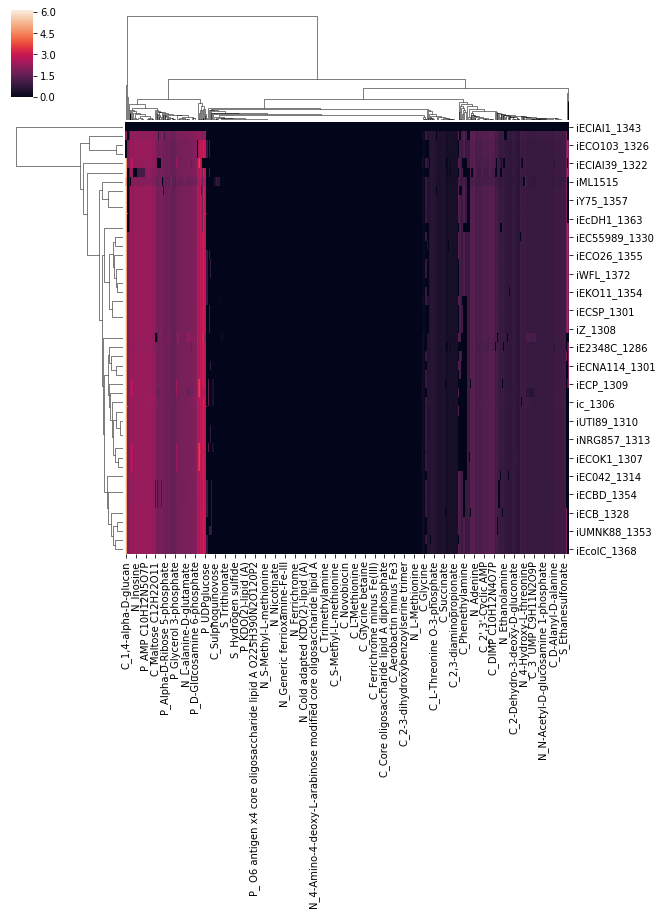

In [5]:
#visualize the growth results:
sns.clustermap(all_growth)

In [6]:
# correlate model-predicted phenotypes with e. coli pathotypes

In [7]:
pathotypes = pd.read_excel('ecoli_pathotypes.xlsx', index_col=0)

In [8]:
pathotypes

,pathotype,ncbi_id,taxonomy_id
model,,,
iLF82_1304,InPec,CU651637,591946
iNRG857_1313,InPec,CP001855,685038
iUMN146_1321,InPec,CP002167,869729
iAPECO1_1312,ExPec,CP000468,405955
iEcolC_1368,Commensal,CP000946,481805
iECB_1328,Commensal,CP000819,413997
iECBD_1354,Commensal,CP001665,469008
iB21_1397,Commensal,AM946981,469008
iECD_1391,Commensal,CP001509,469008


In [9]:
# set up for sklearn:
data = pd.merge(all_growth, pathotypes, left_index=True, right_index=True)

In [10]:
X = data[all_growth.columns]
y = data['pathotype']

In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file='test.png',
    feature_names=X.columns,  
    class_names=y.unique(),  
    filled=True, rounded=True,  
    special_characters=True
) 

graph = graphviz.Source(dot_data) 

In [ ]:
# can use several other packages in SKlearn to correlate predicted metabolic features with known phenotypes (e.g. pathotype here)
# see http://scikit-learn.org/stable/